In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
particlesDict = {}


In [3]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [4]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [33]:
#This function calculates the invariant mass of a particle using the final particles
def invariant_mass(file_name, pid):
    invariant_mass = []
    for e in pylheV.readLHE(file_name):
        for i in range(int(e.eventinfo.nparticles)):
            if e.particles[i].id == pid:
                #Getting daughters
                daughters =  e.particles[i].daughters
                
                #Finding the pre hadronization daughters
                f_daughters = pre_hadronization_gen(e.particles,daughters)
                
                
                #Calculating the invariant mass
                energy = 0
                px = 0
                py = 0
                pz = 0
                #Sum component with component of all daughters
                for j in range(len(f_daughters)):

                    energy = energy + e.particles[f_daughters[j]].e
                    px = px + e.particles[f_daughters[j]].px
                    py = py + e.particles[f_daughters[j]].py
                    pz = pz + e.particles[f_daughters[j]].pz

                inv_mass = np.sqrt(energy**2 - px**2 - py**2 - pz**2)
                
                    

                invariant_mass.append(inv_mass)

                
    return invariant_mass
                 

In [34]:
#This function remove repeated elements
def rm_repeated(vector):
    
    d = [] 
    for i in vector: 
        if i not in d: 
            d.append(i) 
   
    return d

In [35]:
#This function verifies if all particles in the generation are final
def all_final(gen, particles):
    
    for i in gen:
        if particles[i].status < 0:
            return False
        
    return True

In [36]:
#This functions gives the daughters pre hadronization
def pre_hadronization_gen(particles,daughters):
    
    daughters = rm_repeated(daughters)
    gen = [daughters,[]]
    #While all of daughters arent final the function searchs for daughters.
    k = 1
    out = False
    while(out == False):
        new_gen = []
        #
        for i in range(len(gen[k-1])):
            #Verifing if the particle isnt final
            if particles[gen[k-1][i]].status < 0:
                #Getting the particle's daughters
                new_gen += particles[gen[k-1][i]].daughters
            #If the particle is final:
            else:
                #Storing the particle in the next generation
                new_gen += [gen[k-1][i]]
        #Removing repeated elements
        new_gen = rm_repeated(new_gen)
        #Adding the new generation to the generation vector
        gen[k] += new_gen
        #Verifing if all particles are final
        if no_hadrons(gen[k], particles) == False:
            #It is the last generation
            return gen[k-1]
        elif all_final(gen[k], particles) == True:
            out = True
        else:
            #Goes to the next generation
            gen.append([])
            k = k + 1
    

            
    return gen[k]

In [59]:
#This functions verifies if all particles arent hadrons
def no_hadrons(gen, particles):
    for i in gen:
        if abs(particles[i].id) > 100:
            return False
        
    return True
    

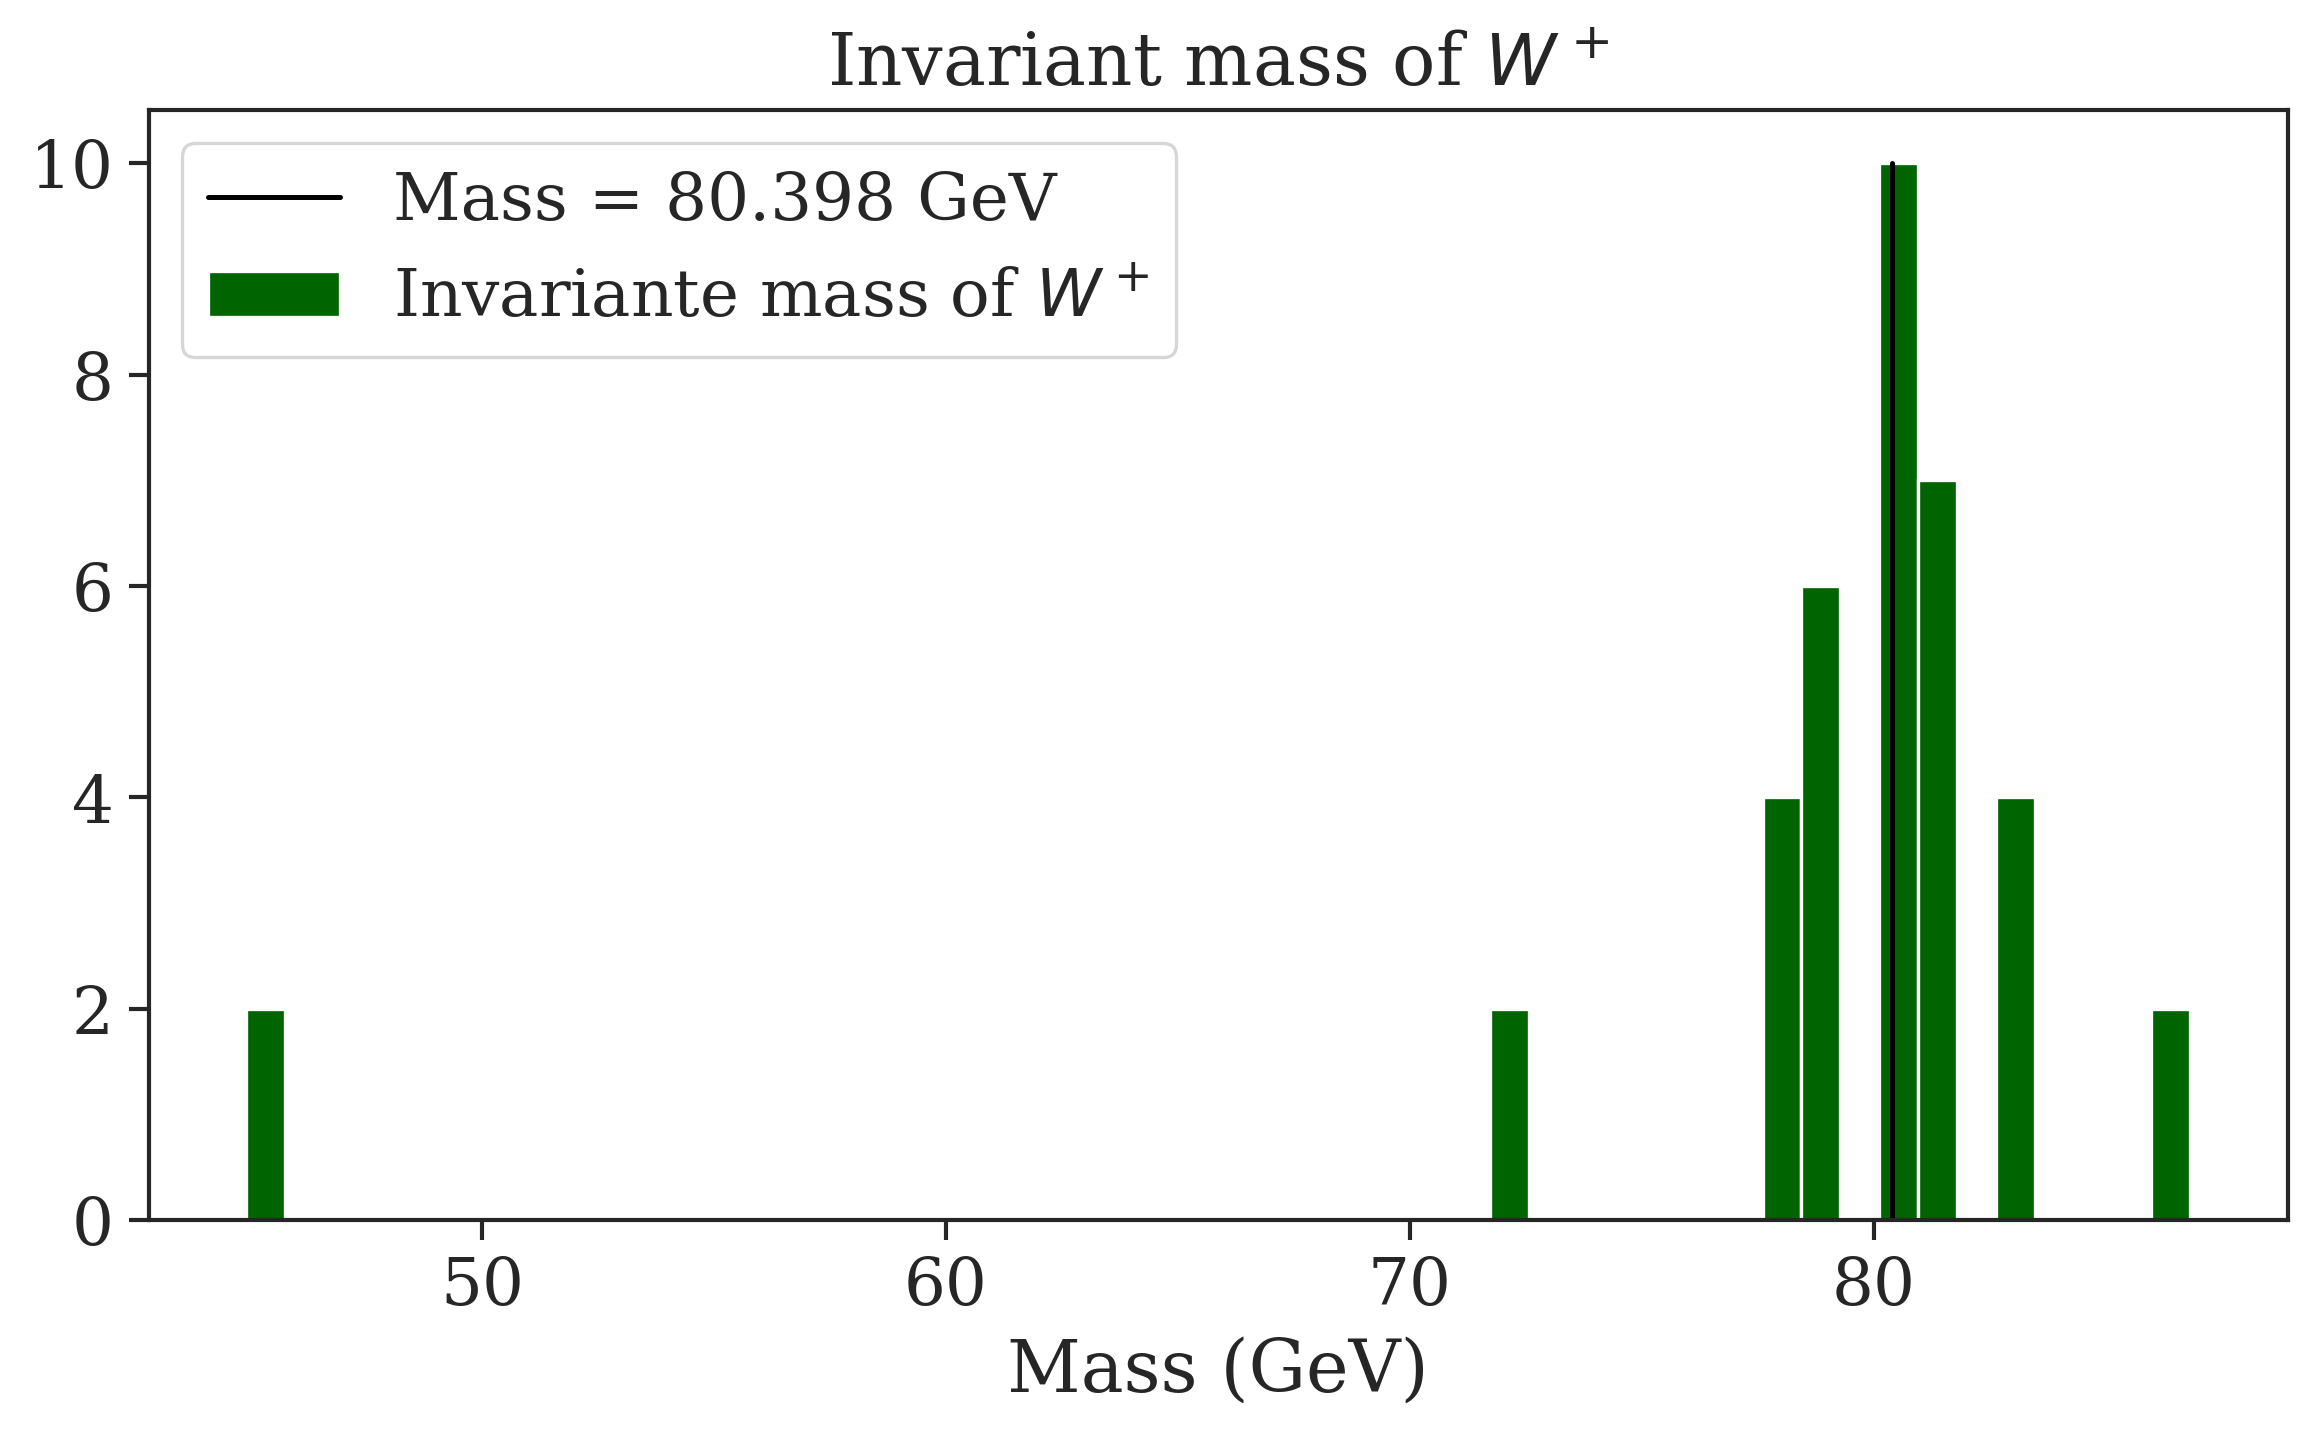

In [60]:
#Invariant mass
w_mass = invariant_mass('pp2ttbar_out.lhe',24)
w_mass = w_mass + invariant_mass('pp2ttbar_out.lhe',-24)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(w_mass, bins = 50, color = 'darkgreen',label =r'Invariante mass of $W^+$')
plt.plot([80.398,80.398],[0,10], color = 'black', label = r'Mass = 80.398 GeV')

plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of $W^+$')
plt.legend()
plt.show()

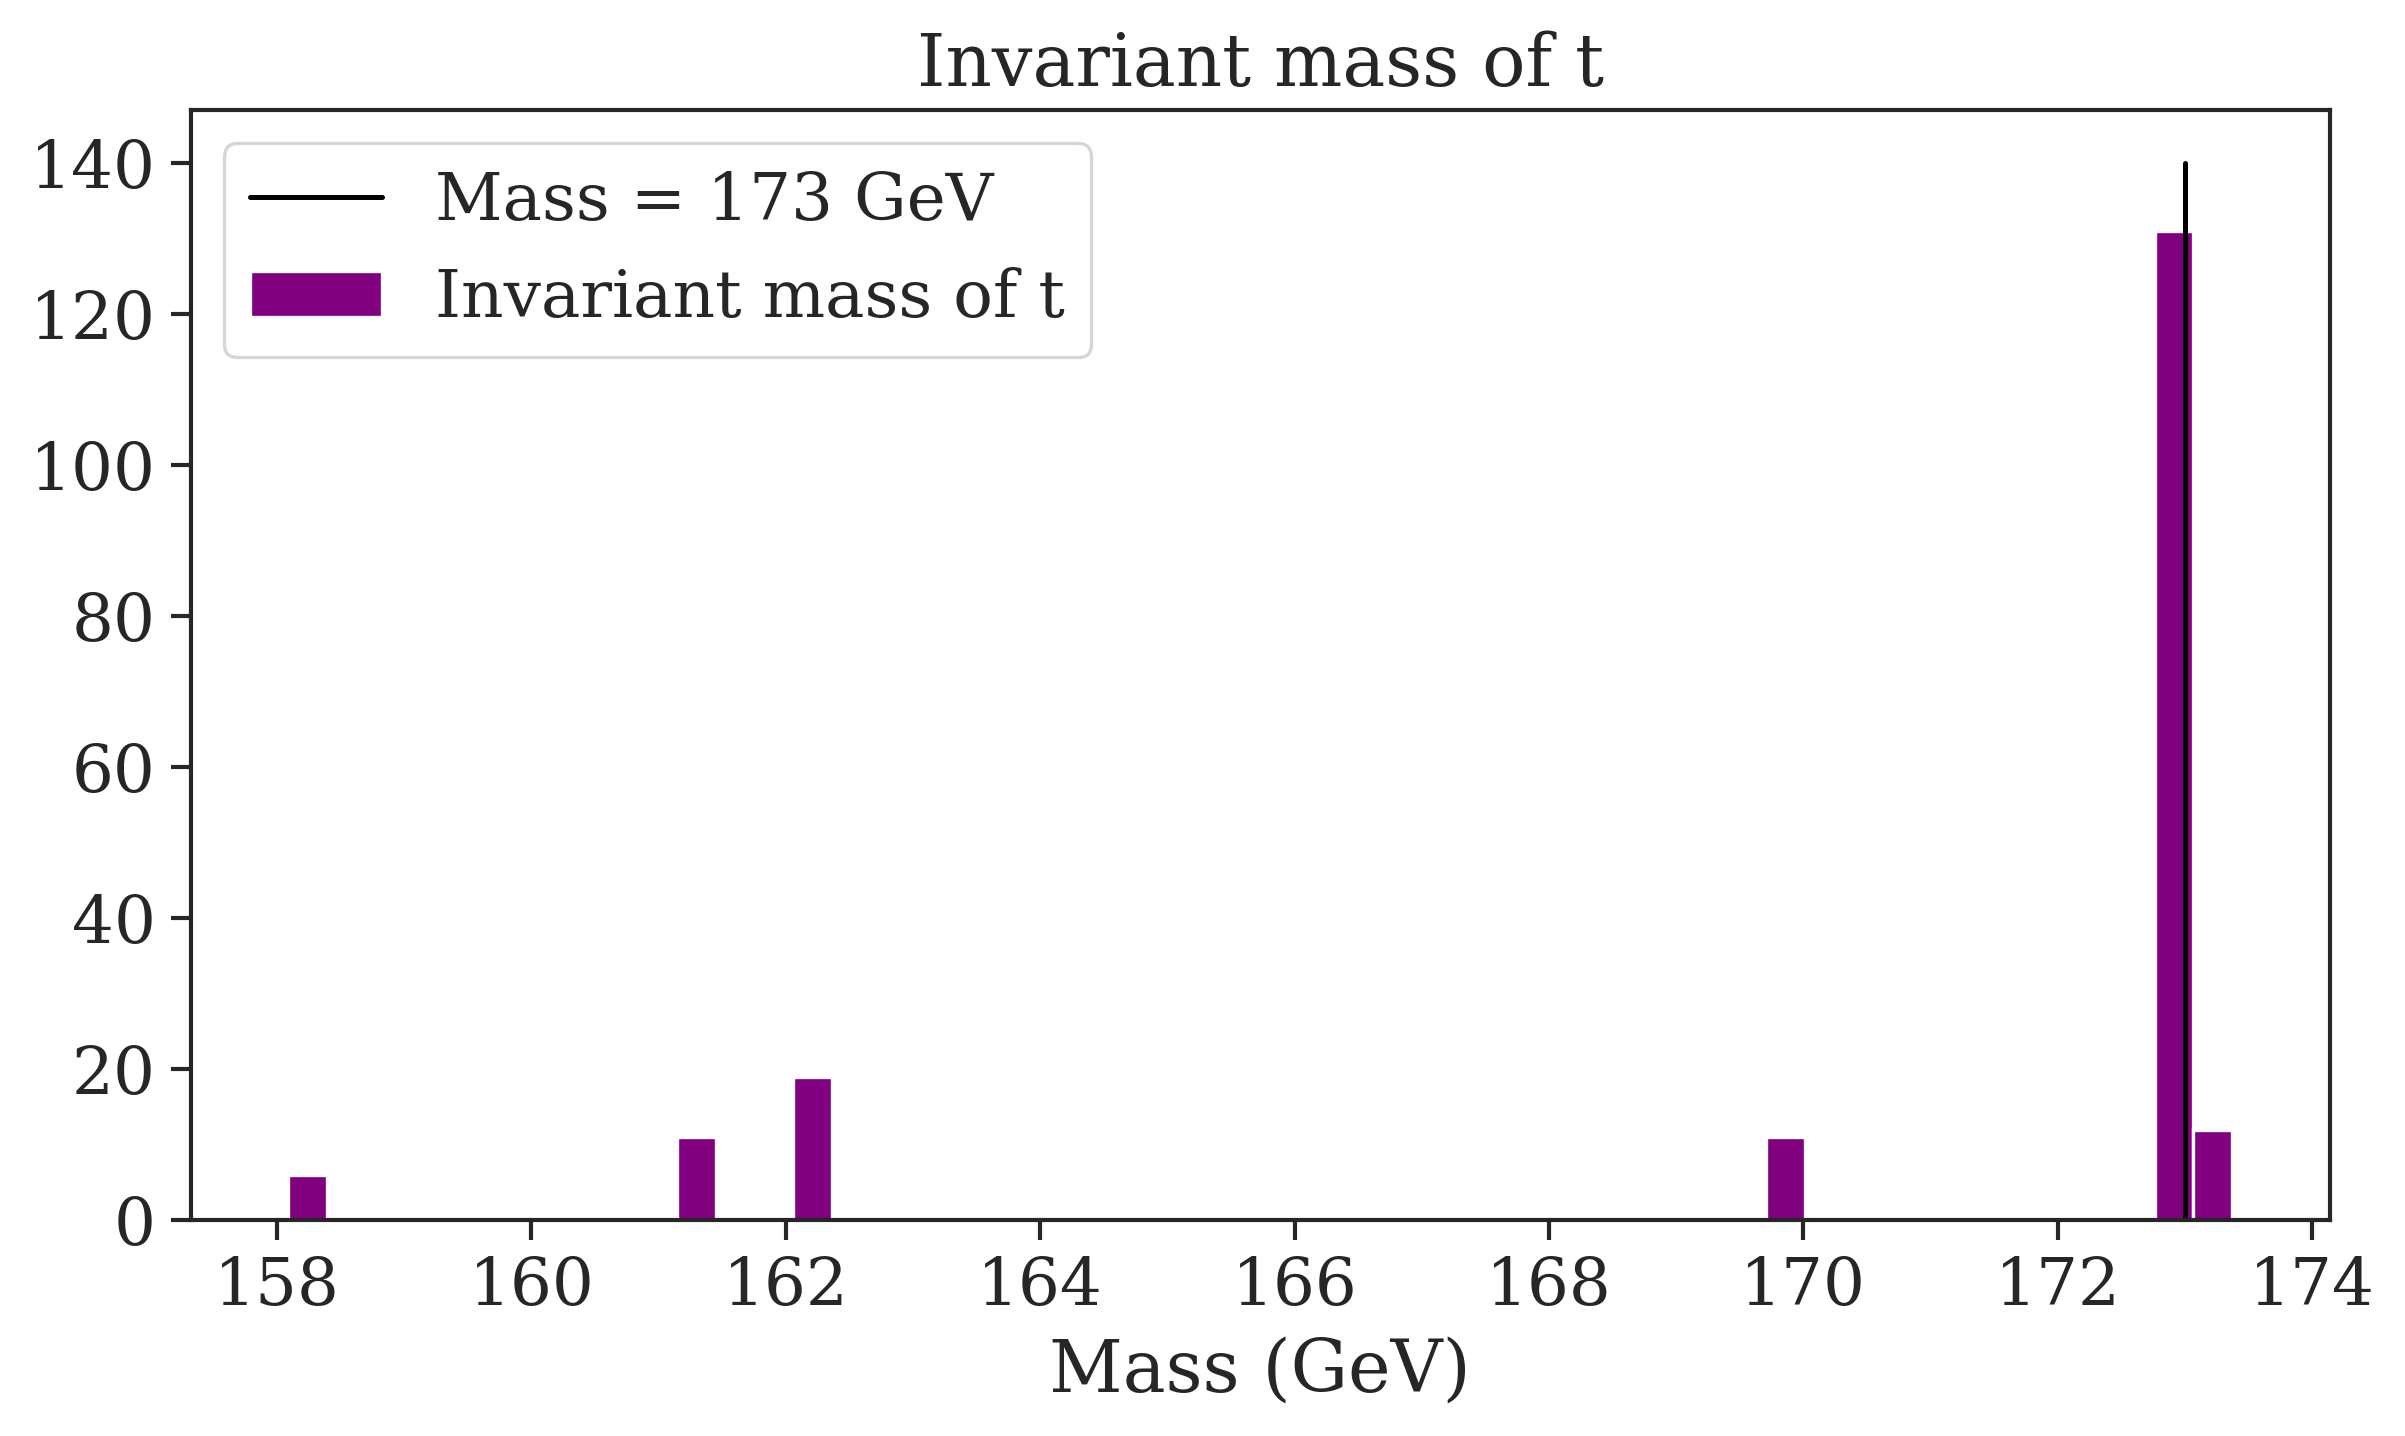

In [61]:
#Invariant mass
t_mass = invariant_mass('pp2ttbar_out.lhe',6)
t_mass = t_mass + invariant_mass('pp2ttbar_out.lhe',-6)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(t_mass, bins = 50, color = 'purple', label = 'Invariant mass of t')
plt.plot([173,173],[0,140], color = 'black', label = r'Mass = 173 GeV')

plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of t')
plt.legend()
plt.show()

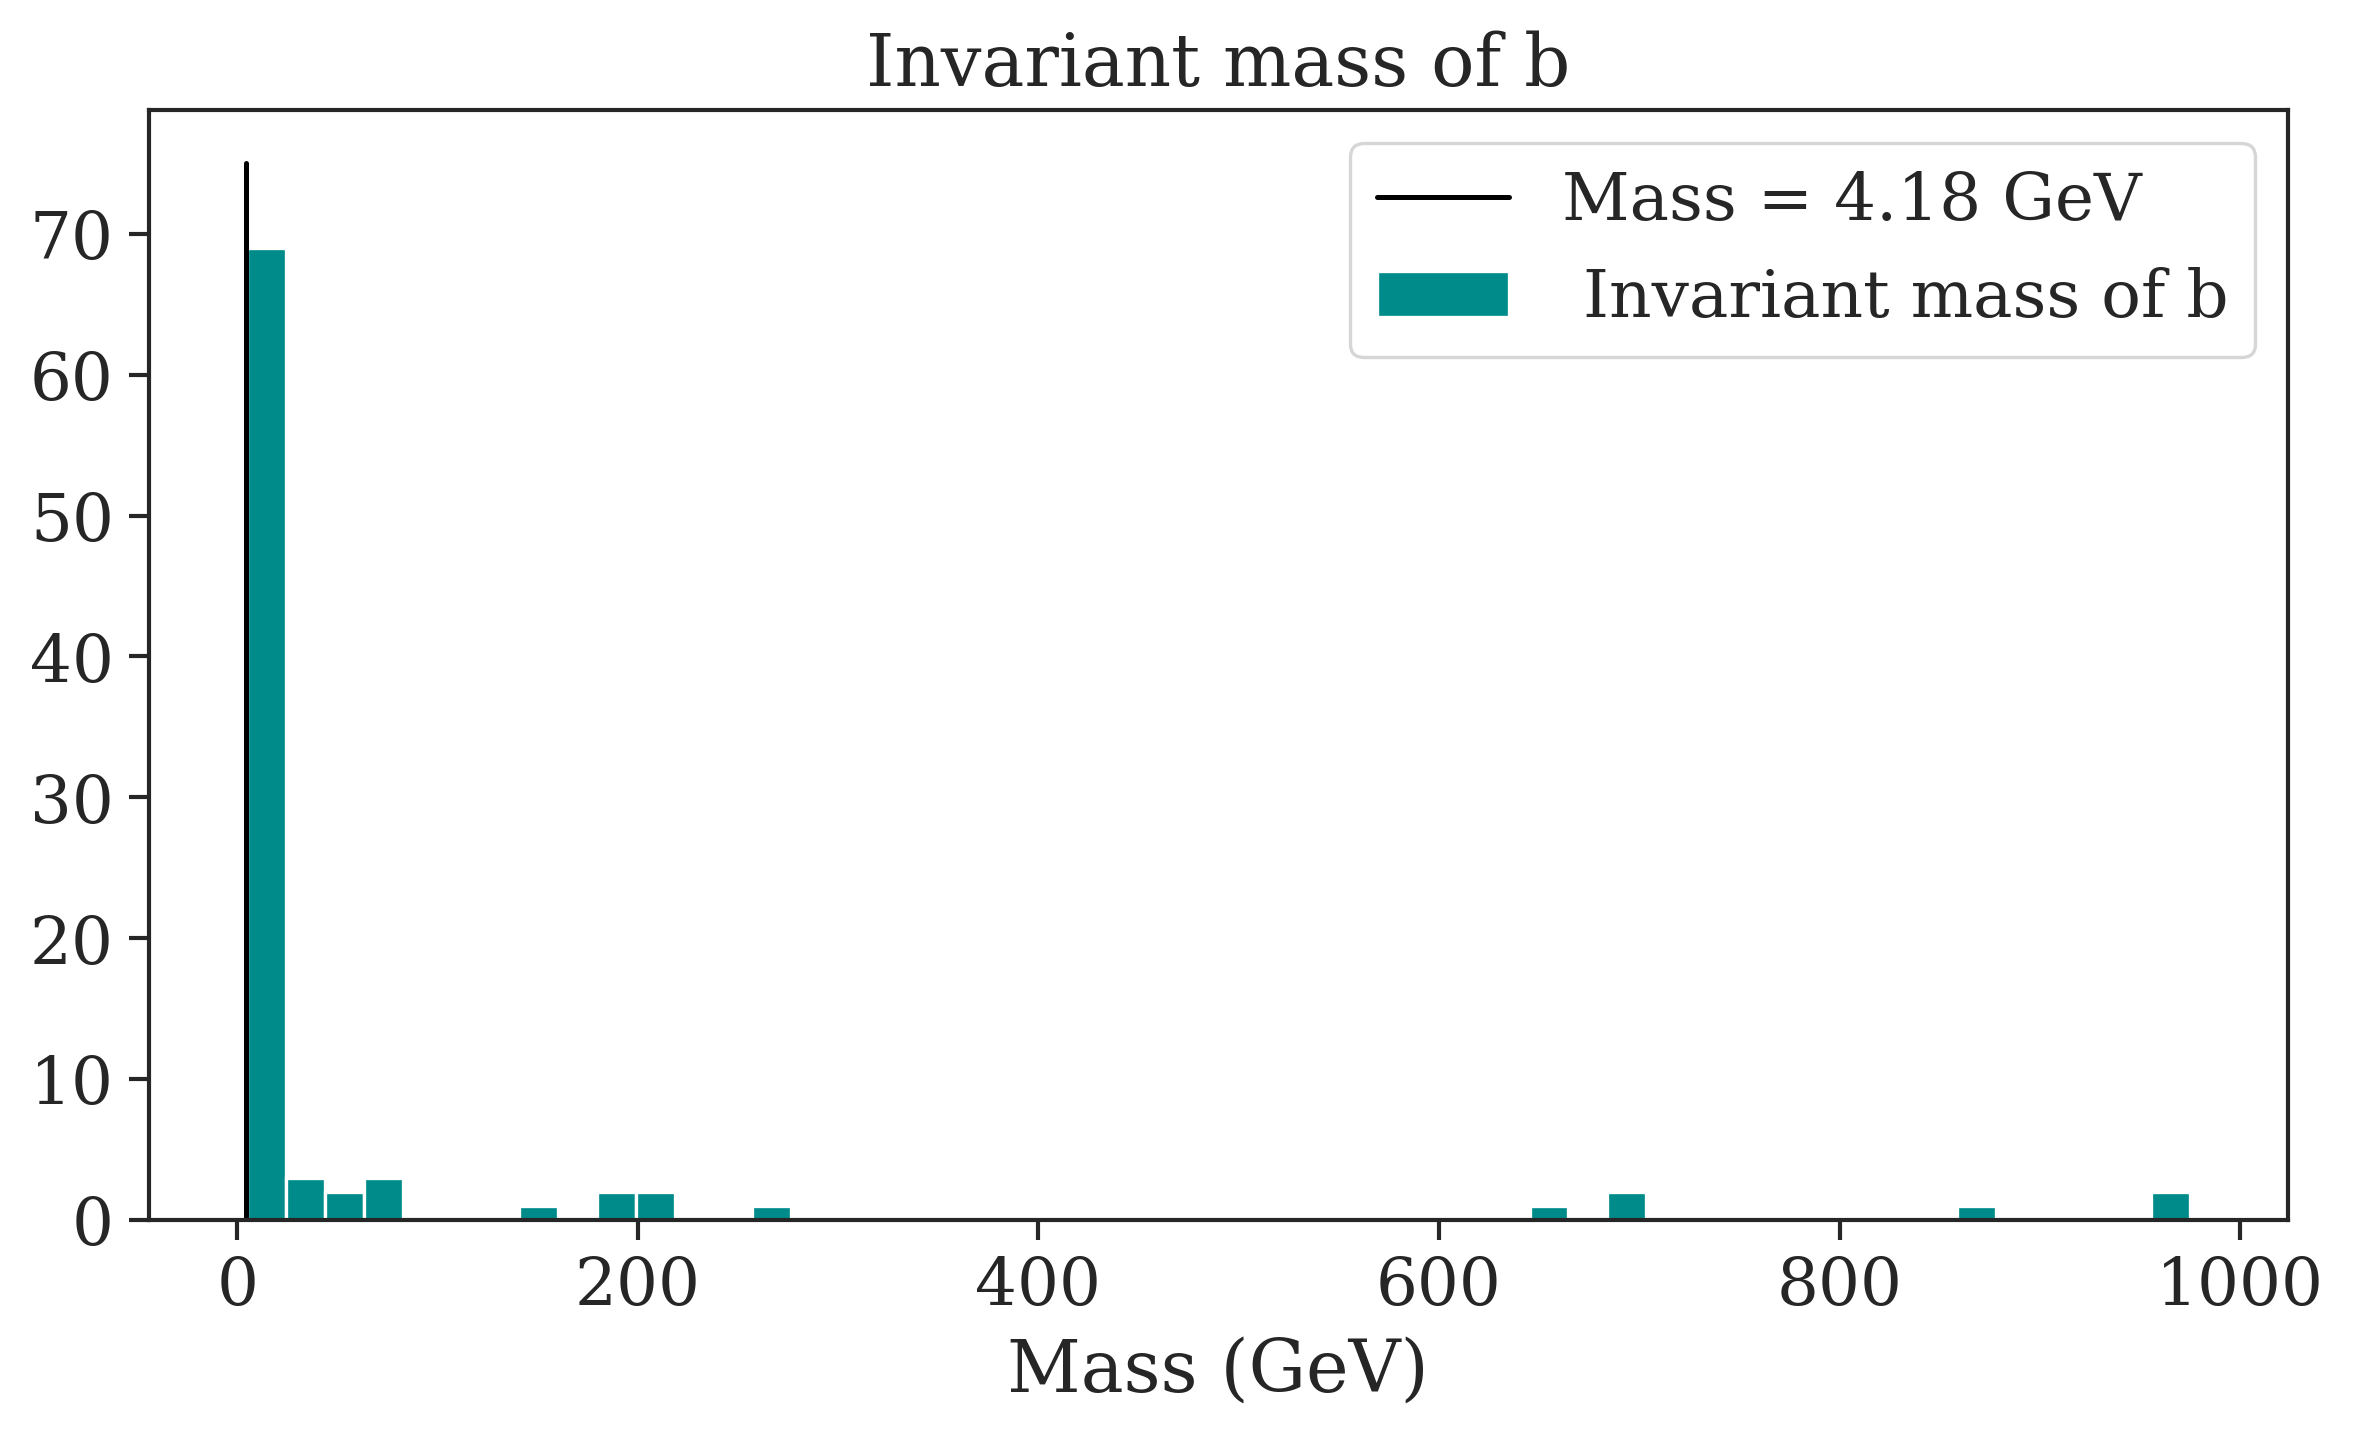

In [58]:
#Invariant mass
b_mass = invariant_mass('pp2ttbar_out.lhe',5)
b_mass = b_mass + invariant_mass('pp2ttbar_out.lhe',-5)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(b_mass, bins = 50, color = 'darkcyan', label = r' Invariant mass of b')
plt.plot([4.18,4.18],[0,75], color = 'black', label = r'Mass = 4.18 GeV')

plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of b')
plt.legend()
plt.show()